In [1]:
using LinearAlgebra
using Distributions
using Plots
default(label="", margin=10Plots.pt)

In [2]:
# True position
pos = (-0.6, 2.4)

(-0.6, 2.4)

In [3]:
# Beacon coordinates
A = (0.5, 3.5)
B = (0.8, 2.5)
C = (2.1, 3.2)

(2.1, 3.2)

In [4]:
function state2measure(pos, A, B)
    
    # Noisy distance to beacons
    rA = sqrt((pos[1] - A[1])^2 + (pos[2] - A[2])^2) + 1e-1*randn()
    rB = sqrt((pos[1] - B[1])^2 + (pos[2] - B[2])^2) + 1e-1*randn()
    
    return rA,rB
end

state2measure (generic function with 1 method)

In [5]:
function measure2state(rA, rB)
    
    # Intersection points
    d = sqrt((A[1] - B[1])^2 + (A[2] - B[2])^2)
    l = (rA^2 - rB^2 + d^2)/(2d)
    h = sqrt(rA^2 - l^2)

    x = l/d*(B[1]−A[1]) + h/d*(B[2]−A[2]) + A[1]
    y = l/d*(B[2]-A[2]) - h/d*(B[1]-A[1]) + A[2]
    
    return x,y
end

measure2state (generic function with 1 method)

In [6]:
N = 100
pos_est = zeros(N,2)

for i = 1:100
    
    rA,rB = state2measure(pos,A,B)
     
    pos_est[i,:] .= measure2state(rA,rB)
    
end

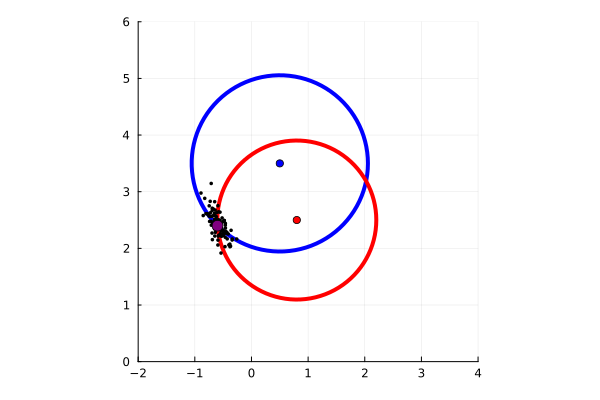

In [8]:
t = range(0.0, stop=2π, length=100)

plot(; ylims=[0., 6.], xlims=[-2., 4.], aspect_ratio=:equal)

rA = sqrt((pos[1] - A[1])^2 + (pos[2] - A[2])^2)
rB = sqrt((pos[1] - B[1])^2 + (pos[2] - B[2])^2)

plot!(A[1] .+ rA*cos.(t), A[2] .+ rA*sin.(t), lw=4, color="blue")
scatter!([A[1]], [A[2]], color="blue")
plot!(B[1] .+ rB*cos.(t), B[2] .+ rB*sin.(t), lw=4, color="red")
scatter!([B[1]], [B[2]], color="red")

scatter!(pos_est[:,1], pos_est[:,2], color="black", markersize=2)

scatter!([pos[1]], [pos[2]], color="purple", markersize=6)